#Q. Load the Iris dataset, available at "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", has columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"] three species: setosa, versicolor, and vir-ginica. Load the Iris dataset using pandas.



In [1]:
import pandas as pd
import numpy as np

#Load the Iris dataset

In [2]:

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=column_names)


print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
iris_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check for null values in the dataset

In [5]:

iris_df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# Drop rows with any null values

In [6]:
iris_df.dropna(inplace = True)
#or

iris_df_cleaned = iris_df.dropna()



# Fill null values with a specific value, e.g., 0

In [7]:

iris_df_filled = iris_df.fillna(0)


`# Introduce some null values for demonstration`

In [8]:

iris_df.loc[0:5, 'sepal_length'] = None

In [9]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,Iris-setosa
1,NaN,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,NaN,3.1,1.5,0.2,Iris-setosa
4,NaN,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Calculate the mean of each numeric column (excluding non-numeric columns like 'species')

In [10]:

mean_values = iris_df.mean(numeric_only = True)

# Fill null values with their mean
iris_df = iris_df.fillna(mean_values)


In [11]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.880556,3.5,1.4,0.2,Iris-setosa
1,5.880556,3.0,1.4,0.2,Iris-setosa
2,5.880556,3.2,1.3,0.2,Iris-setosa
3,5.880556,3.1,1.5,0.2,Iris-setosa
4,5.880556,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,Iris-virginica
146,6.300000,2.5,5.0,1.9,Iris-virginica
147,6.500000,3.0,5.2,2.0,Iris-virginica
148,6.200000,3.4,5.4,2.3,Iris-virginica


# Get the count of each species

In [12]:

iris_df['species'].value_counts()


,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Sort by sepal length

In [13]:

iris_df_sorted = iris_df.sort_values(by='sepal_length')
iris_df_sorted

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


# Get unique species

In [14]:

iris_df['species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Apply a function to each element of a column

In [15]:

iris_df['sepal_length_squared'] = iris_df['sepal_length'].apply(lambda x: x ** 2)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_squared
0,5.880556,3.5,1.4,0.2,Iris-setosa,34.580934
1,5.880556,3.0,1.4,0.2,Iris-setosa,34.580934
2,5.880556,3.2,1.3,0.2,Iris-setosa,34.580934
3,5.880556,3.1,1.5,0.2,Iris-setosa,34.580934
4,5.880556,3.6,1.4,0.2,Iris-setosa,34.580934
...,...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,Iris-virginica,44.890000
146,6.300000,2.5,5.0,1.9,Iris-virginica,39.690000
147,6.500000,3.0,5.2,2.0,Iris-virginica,42.250000
148,6.200000,3.4,5.4,2.3,Iris-virginica,38.440000


In [17]:
iris_df.drop(columns = ['sepal_length_squared'], inplace = True)

# Group the data by species

In [18]:

grouped_df = iris_df.groupby('species')
print("Grouped Data by Species:")
for name, group in grouped_df:
    print(f"Species: {name}")
    print(group.head())

Grouped Data by Species:
Species: Iris-setosa
   sepal_length  sepal_width  petal_length  petal_width      species
0      5.880556          3.5           1.4          0.2  Iris-setosa
1      5.880556          3.0           1.4          0.2  Iris-setosa
2      5.880556          3.2           1.3          0.2  Iris-setosa
3      5.880556          3.1           1.5          0.2  Iris-setosa
4      5.880556          3.6           1.4          0.2  Iris-setosa
Species: Iris-versicolor
    sepal_length  sepal_width  petal_length  petal_width          species
50           7.0          3.2           4.7          1.4  Iris-versicolor
51           6.4          3.2           4.5          1.5  Iris-versicolor
52           6.9          3.1           4.9          1.5  Iris-versicolor
53           5.5          2.3           4.0          1.3  Iris-versicolor
54           6.5          2.8           4.6          1.5  Iris-versicolor
Species: Iris-virginica
     sepal_length  sepal_width  petal_length  p


# Calculate the mean sepal length for each species

In [19]:

mean_sepal_length = iris_df.groupby('species')['sepal_length'].mean()
print("Mean Sepal Length for each species:")
print(mean_sepal_length)

Mean Sepal Length for each species:
species
Iris-setosa        5.117667
Iris-versicolor    5.936000
Iris-virginica     6.588000
Name: sepal_length, dtype: float64


# Find maximum sepal width for Versicolor

In [20]:

max_sepal_width_versicolor = iris_df[iris_df['species'] == 'Iris-versicolor']['sepal_width'].max()
print("Versicolor - Max Sepal Width:", max_sepal_width_versicolor)

Versicolor - Max Sepal Width: 3.4


# Plot the bar chart

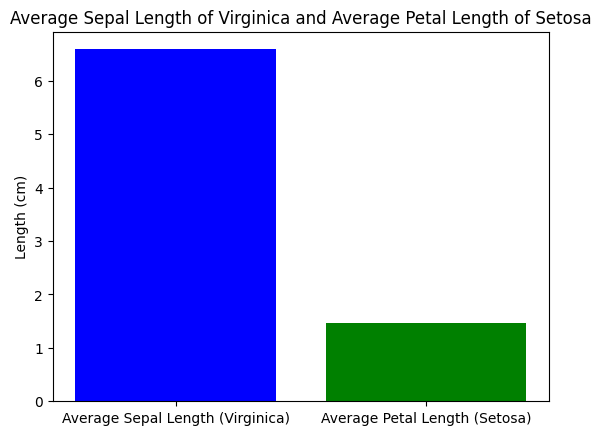

In [21]:


import matplotlib.pyplot as plt

# Calculate the average sepal length of Virginica and average petal length of Setosa
avg_sepal_length_virginica = iris_df[iris_df['species'] == 'Iris-virginica']['sepal_length'].mean()
avg_petal_length_setosa = iris_df[iris_df['species'] == 'Iris-setosa']['petal_length'].mean()

# Plot the bar chart
plt.bar(['Average Sepal Length (Virginica)', 'Average Petal Length (Setosa)'],
        [avg_sepal_length_virginica, avg_petal_length_setosa],
        color=['blue', 'green'])
plt.title('Average Sepal Length of Virginica and Average Petal Length of Setosa')
plt.ylabel('Length (cm)')
plt.show()

                         max          min
                sepal_length sepal_length
species                                  
Iris-setosa         5.880556          4.3
Iris-versicolor     7.000000          4.9
Iris-virginica      7.900000          4.9


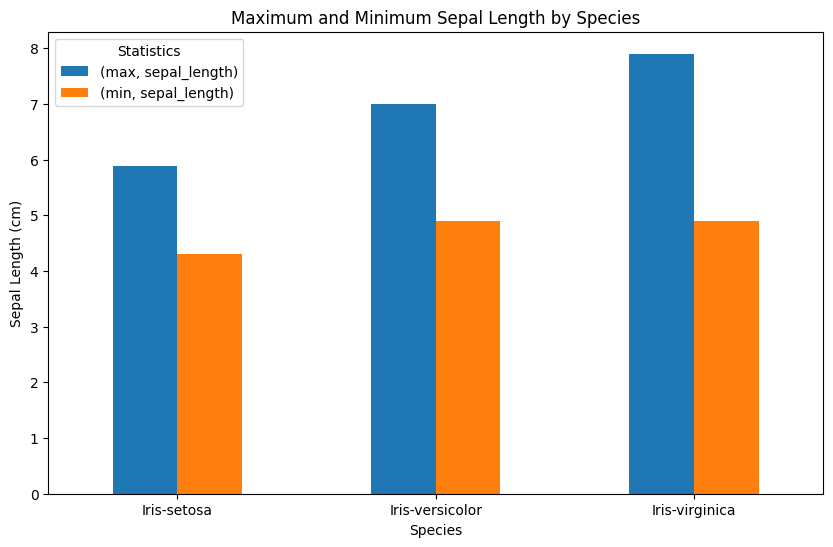

In [22]:
# Pivot the DataFrame to get the maximum and minimum sepal length for each species
pivot_df = iris_df.pivot_table(values='sepal_length', index='species', aggfunc=['max', 'min'])

# Print the pivot table to verify
print(pivot_df)

# Plot the maximum and minimum sepal length for each species
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Maximum and Minimum Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Statistics')
plt.show()